In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScalar
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliners_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\MIDAS\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [16]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [17]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [18]:
df.shape

(571, 43)

In [19]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [20]:
# SINCE WE HAVE NULL VALUES, WE NEED TO FIRST FILL THE SAME USING IMPUTER (MEAN METHOD)

In [21]:
#RENAMING THE DIFF NAMES

In [30]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [31]:
df.head(2)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008


In [32]:
df.isnull().mean()*100

Seat No.     0.000000
PH-121       0.000000
HS-101       0.000000
CY-105       0.175131
HS-105       0.175131
MT-111       0.350263
CS-105       0.000000
CS-106       0.350263
EL-102       0.350263
EE-119       0.350263
ME-107       0.350263
CS-107       0.350263
HS-205       0.875657
MT-222       0.875657
EE-222       1.225919
MT-224       1.225919
CS-210       1.225919
CS-211       0.875657
CS-203       0.875657
CS-214       1.050788
EE-217       1.050788
CS-212       1.050788
CS-215       1.050788
MT-331       1.576182
EF-303       1.751313
HS-304       1.751313
CS-301       1.751313
CS-302       1.751313
TC-383       1.751313
MT-442       1.751313
EL-332       1.576182
CS-318       1.576182
CS-306       1.576182
CS-312       1.751313
CS-317       2.101576
CS-403       2.101576
CS-421       2.101576
CS-406      14.886165
CS-414       2.276708
CS-419       2.276708
CS-423       2.451839
CS-412      13.835377
CGPA         0.000000
dtype: float64

In [70]:
df.drop('Seat.No.',axis=1)

KeyError: "['Seat.No.'] not found in axis"

In [71]:
df_i = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [72]:
df_i.isnull().sum()

Seat No.    0
PH-121      0
HS-101      0
CY-105      0
HS-105      0
MT-111      0
CS-105      0
CS-106      0
EL-102      0
EE-119      0
ME-107      0
CS-107      0
HS-205      0
MT-222      0
EE-222      0
MT-224      0
CS-210      0
CS-211      0
CS-203      0
CS-214      0
EE-217      0
CS-212      0
CS-215      0
MT-331      0
EF-303      0
HS-304      0
CS-301      0
CS-302      0
TC-383      0
MT-442      0
EL-332      0
CS-318      0
CS-306      0
CS-312      0
CS-317      0
CS-403      0
CS-421      0
CS-406      0
CS-414      0
CS-419      0
CS-423      0
CS-412      0
CGPA        0
dtype: int64

In [80]:
df_i.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [79]:
for column in df_i.columns:
    
    df_i[column]=df_i[column].replace('A+',4.0)
    df_i[column]=df_i[column].replace('A',4.0)
    df_i[column]=df_i[column].replace('A-',3.7)
    df_i[column]=df_i[column].replace('B+',3.4)
    df_i[column]=df_i[column].replace('B',3.0)
    df_i[column]=df_i[column].replace('B-',2.7)
    df_i[column]=df_i[column].replace('C+',2.4)
    df_i[column]=df_i[column].replace('C',2.0)
    df_i[column]=df_i[column].replace('C-',1.7)
    df_i[column]=df_i[column].replace('D+',1.4)
    df_i[column]=df_i[column].replace('D',1.0)
    df_i[column]=df_i[column].replace('F',0.0)

In [81]:
df_i.head(2)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008


In [82]:
df_i.corr()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
HS-101,1.000000,0.432621,0.151900,0.310643,0.373809,0.344223,0.254436,0.409697,0.243646,0.283499,0.240377,0.562432
CS-105,0.432621,1.000000,0.230586,0.244551,0.450468,0.208635,0.446805,0.397065,0.268677,0.317141,0.044027,0.627746
MT-331,0.151900,0.230586,1.000000,0.529686,0.403378,0.433798,0.320140,0.480862,0.463075,0.466236,0.331304,0.514984
CS-301,0.310643,0.244551,0.529686,1.000000,0.594196,0.647684,0.442251,0.663958,0.612552,0.632891,0.600443,0.698290
CS-302,0.373809,0.450468,0.403378,0.594196,1.000000,0.508711,0.533834,0.650783,0.438038,0.539169,0.459356,0.704748
TC-383,0.344223,0.208635,0.433798,0.647684,0.508711,1.000000,0.301546,0.579772,0.538570,0.503410,0.549923,0.598895
MT-442,0.254436,0.446805,0.320140,0.442251,0.533834,0.301546,1.000000,0.518189,0.335705,0.432858,0.289501,0.582635
CS-317,0.409697,0.397065,0.480862,0.663958,0.650783,0.579772,0.518189,1.000000,0.529344,0.630607,0.557037,0.785866
CS-403,0.243646,0.268677,0.463075,0.612552,0.438038,0.538570,0.335705,0.529344,1.000000,0.628865,0.348681,0.560895
CS-419,0.283499,0.317141,0.466236,0.632891,0.539169,0.503410,0.432858,0.630607,0.628865,1.000000,0.479060,0.653644


In [ ]:
#Plotting heatmap- to understand correlation

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

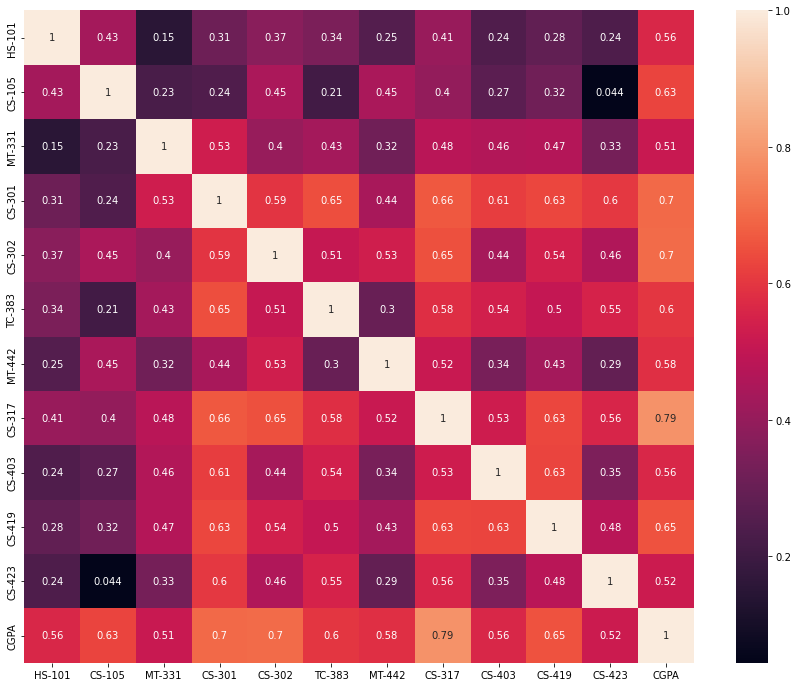

In [84]:
plt.figure(figsize=[15,12])
sns.heatmap(df_i.corr(),annot=True)

In [27]:
# NO SUCH CORRELATION BETWEEN THEM EXISTS

In [28]:
#PLOTTING BOXPLOT FOR OUTLIER

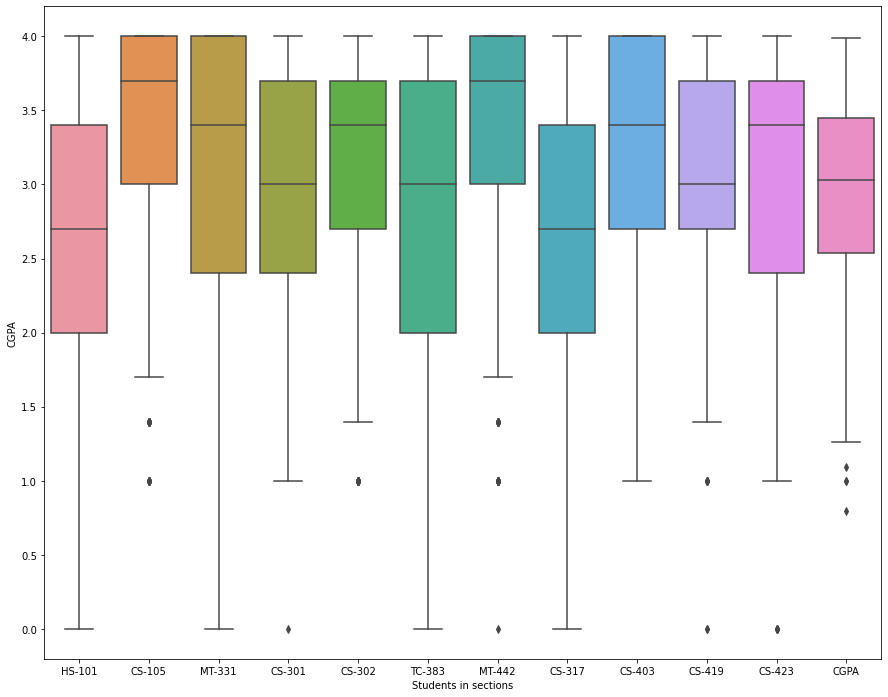

In [50]:
plt.figure(figsize=[15,12])
sns.boxplot(data=df_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

In [52]:
# we can see outliers exists in CS-105, CS-301, CS-302, MT-442 CS-419 , CS-423, LETS CONFIRM FURTHER

In [52]:
df_i2=df_i['CGPA'] >3

In [53]:
df_i2

0      False
1      False
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569    False
570    False
Name: CGPA, Length: 571, dtype: bool

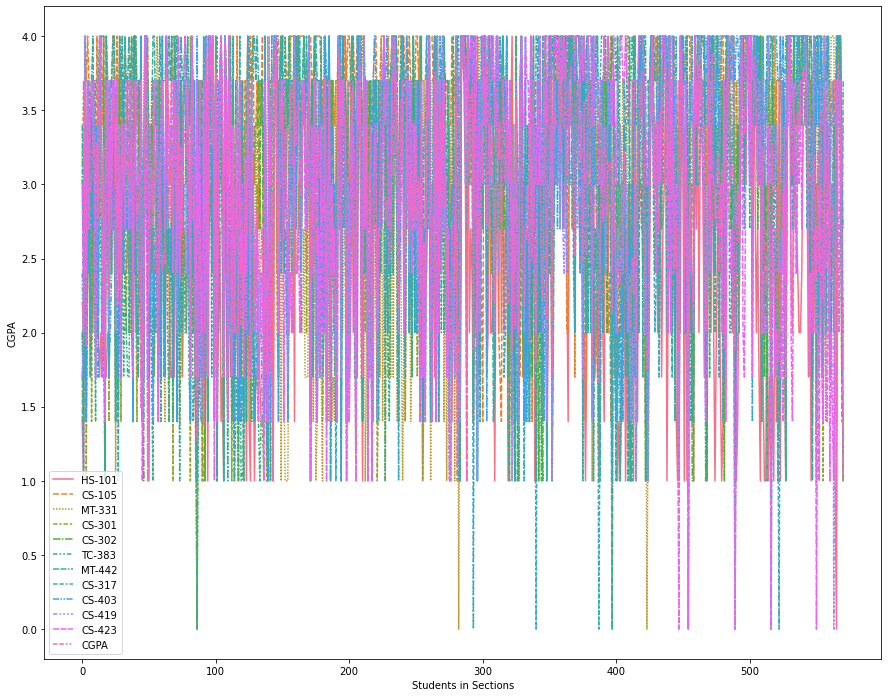

In [55]:
plt.figure(figsize=[15,12])
sns.lineplot(data=df_i)
plt.xlabel('Students in Sections')
plt.ylabel('CGPA')
plt.show()

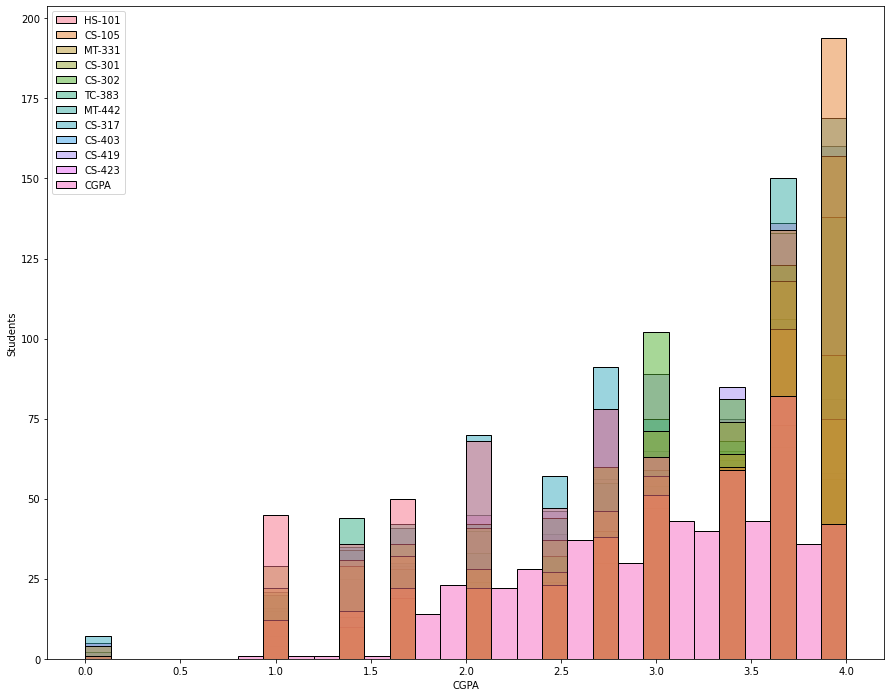

In [54]:
plt.figure(figsize=[15,12])
sns.histplot(data=df_i) 
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.show()

In [55]:
df_i.describe()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.628371,3.329247,3.086690,2.915587,3.114886,2.943783,3.266900,2.707881,3.152890,3.047811,2.997023,2.954888
std,0.908402,0.799826,0.948423,0.898724,0.780602,0.952288,0.855492,0.869497,0.852533,0.739991,0.880316,0.620552
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,2.400000,2.400000,2.700000,2.000000,3.000000,2.000000,2.700000,2.700000,2.400000,2.538000
50%,2.700000,3.700000,3.400000,3.000000,3.400000,3.000000,3.700000,2.700000,3.400000,3.000000,3.400000,3.029000
75%,3.400000,4.000000,4.000000,3.700000,3.700000,3.700000,4.000000,3.400000,4.000000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


<AxesSubplot:xlabel='MT-331', ylabel='Count'>

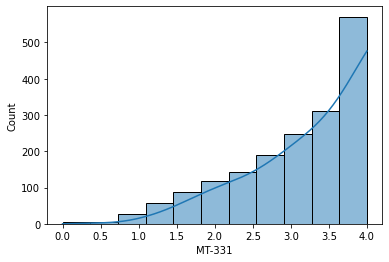

In [56]:
sns.histplot(df_i['MT-331'],cumulative=True, kde=True)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

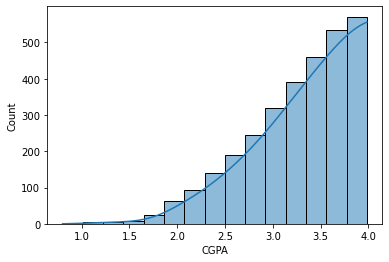

In [60]:
sns.histplot(df_i['CGPA'],cumulative=True, kde=True)

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

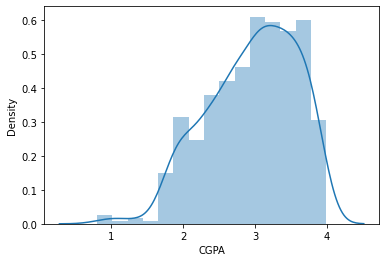

In [61]:
sns.distplot(df_i['CGPA'])


<AxesSubplot:xlabel='HS-101', ylabel='Density'>

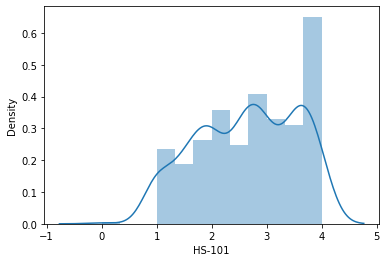

In [62]:
sns.distplot(df_i['HS-101'])

<AxesSubplot:xlabel='CS-105', ylabel='Density'>

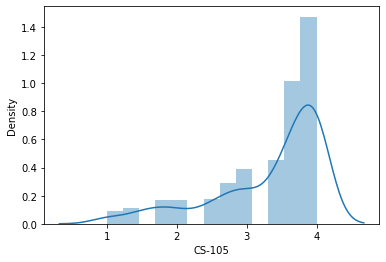

In [63]:
sns.distplot(df_i['CS-105'])

In [64]:
# we can see it is not normally distributed

<AxesSubplot:xlabel='MT-331', ylabel='Density'>

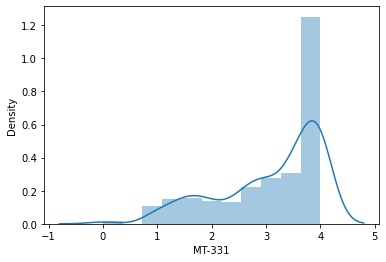

In [65]:
sns.distplot(df_i['MT-331'])

<AxesSubplot:xlabel='CS-301', ylabel='Density'>

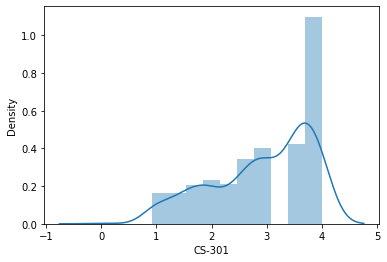

In [66]:
sns.distplot(df_i['CS-301'])

<AxesSubplot:xlabel='CS-302', ylabel='Density'>

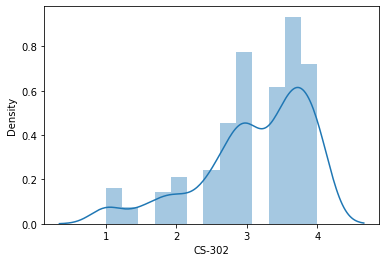

In [67]:
sns.distplot(df_i['CS-302'])

<AxesSubplot:xlabel='TC-383', ylabel='Density'>

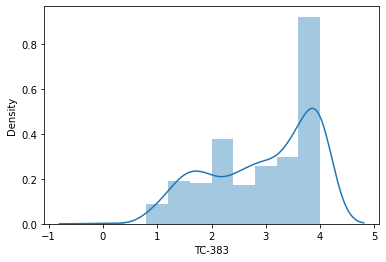

In [68]:
sns.distplot(df_i['TC-383'])

<AxesSubplot:xlabel='MT-442', ylabel='Density'>

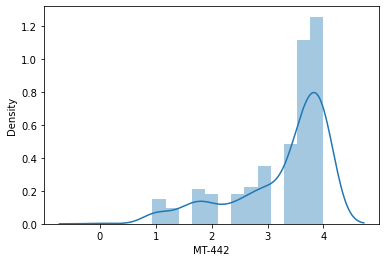

In [69]:
sns.distplot(df_i['MT-442'])

<AxesSubplot:xlabel='CS-317', ylabel='Density'>

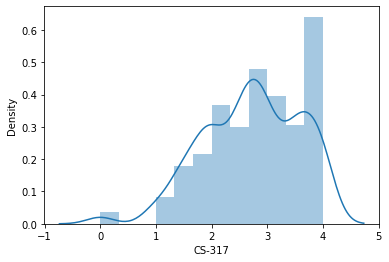

In [70]:
sns.distplot(df_i['CS-317'])

<AxesSubplot:xlabel='CS-403', ylabel='Density'>

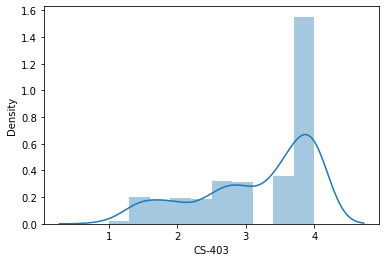

In [71]:
sns.distplot(df_i['CS-403'])

<AxesSubplot:xlabel='CS-419', ylabel='Density'>

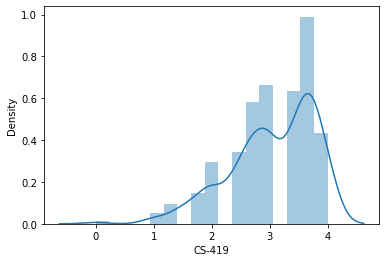

In [72]:
sns.distplot(df_i['CS-419'])

<AxesSubplot:xlabel='CS-423', ylabel='Density'>

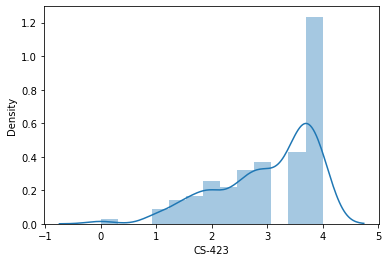

In [73]:
sns.distplot(df_i['CS-423'])

In [58]:
X=df_i.drop(['CGPA'],axis='columns')
y=df_i.CGPA

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [86]:
df_i.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,CS-97005,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [92]:
df_i.drop(['Seat No.'],axis=1,inplace=True)

In [93]:
X=df_i.drop(['CGPA'],axis='columns')
y=df_i.CGPA

In [98]:
df_i.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [102]:
X=df_i.drop(['CGPA'],axis='columns')
y=df_i.CGPA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (456, 41)
Size of y_train :  (456,)
Size of X_test :  (115, 41)
Size of Y_test :  (115,)


In [107]:
df_i.describe()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.628371,3.329247,3.086690,2.915587,3.114886,2.943783,3.266900,2.707881,3.152890,3.047811,2.997023,2.954888
std,0.908402,0.799826,0.948423,0.898724,0.780602,0.952288,0.855492,0.869497,0.852533,0.739991,0.880316,0.620552
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,2.400000,2.400000,2.700000,2.000000,3.000000,2.000000,2.700000,2.700000,2.400000,2.538000
50%,2.700000,3.700000,3.400000,3.000000,3.400000,3.000000,3.700000,2.700000,3.400000,3.000000,3.400000,3.029000
75%,3.400000,4.000000,4.000000,3.700000,3.700000,3.700000,4.000000,3.400000,4.000000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [110]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    float64
 2   CY-105  571 non-null    object 
 3   HS-105  571 non-null    object 
 4   MT-111  571 non-null    object 
 5   CS-105  571 non-null    float64
 6   CS-106  571 non-null    object 
 7   EL-102  571 non-null    object 
 8   EE-119  571 non-null    object 
 9   ME-107  571 non-null    object 
 10  CS-107  571 non-null    object 
 11  HS-205  571 non-null    object 
 12  MT-222  571 non-null    object 
 13  EE-222  571 non-null    object 
 14  MT-224  571 non-null    object 
 15  CS-210  571 non-null    object 
 16  CS-211  571 non-null    object 
 17  CS-203  571 non-null    object 
 18  CS-214  571 non-null    object 
 19  EE-217  571 non-null    object 
 20  CS-212  571 non-null    object 
 21  CS-215  571 non-null    object 
 22  MT